In [1]:
import psycopg2
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt

import seaborn as sns
import datetime

## Clean Infielder Datasets

In [ ]:
#dfinf1 (infielder who played btwn 30 to 100 gms) = clutch_inf_30.csv
#dfinf2 (infielder whe played at least 100gms) = clutch_inf_100.csv
#dfinf3 (infielder who made atleast 5 allstar gms) = allstr_clutch_inf.csv

## Data Ingestion

In [2]:
import psycopg2 as p2
conn = p2.connect(database = 'player_stats', user ='baseball_master', password = 'georgetowndata', 
                  host = 'georgetown-baseball.cnfqonxqdbry.us-east-1.rds.amazonaws.com', 
                  port = '5432')

## Data sets created

In [10]:
#dfinf1 = pd.read_csv('clutch_inf_30.csv', index_col=0)
#dfinf2 = pd.read_csv('clutch_inf_100.csv', index_col=0)
dfinf3 = pd.read_csv('allstr_clutch_inf.csv', index_col=0)

In [11]:
#Clear data set of NaN values
#dfinf1 = dfinf1.fillna(0)
#dfinf2 = dfinf2.fillna(0)
dfinf3 = dfinf3.fillna(0)

In [21]:
#dfinf1.head()
#dfinf2.head()
#dfinf3.head()

,yearID,playerID,event_count,average_win_change,clutch_win_change,POS,G_x,nameFirst,nameLast,birthYear,...,R,HR,RBI,AVG,1B,TB,SLG,OBP,OPS,RC
0,1950.0,gordojo01,438.0,0.010324,-0.014679,2B,105.0,Joe,Gordon,1915.0,...,59.0,19.0,57.0,0.236413,74.0,98.0,0.266304,0.340376,0.606680,33.356808
1,1950.0,reesepe01,648.0,0.013437,-0.011967,SS,134.0,Pee Wee,Reese,1918.0,...,97.0,11.0,52.0,0.259887,112.0,154.0,0.290019,0.369181,0.659200,56.853933
2,1950.0,robinja02,655.0,0.015736,-0.016030,2B,144.0,Jackie,Robinson,1919.0,...,99.0,14.0,81.0,0.328185,127.0,205.0,0.395753,0.422886,0.818638,86.691542
3,1950.0,hodgegi01,676.0,0.013403,-0.014228,1B,153.0,Gil,Hodges,1924.0,...,98.0,32.0,113.0,0.283422,131.0,183.0,0.326203,0.366929,0.693132,67.148031
4,1950.0,kellge01,614.0,0.014331,-0.012303,3B,157.0,George,Kell,1922.0,...,114.0,8.0,101.0,0.340094,156.0,268.0,0.418097,0.402542,0.820639,107.881356


## Summary Statistics 

### Infielders who played atleast 30 games

In [7]:
dfinf1[["AVG", "HR", "H", "TB", "SLG", "OPS", "OBP","BB","RC"]].describe()

,AVG,HR,H,TB,SLG,OPS,OBP,BB,RC
count,6709.000000,6709.000000,6709.000000,6709.000000,6709.000000,6709.000000,6709.000000,6709.000000,6709.000000
mean,0.246973,5.614250,65.759279,75.885378,0.284590,0.597056,0.312466,24.048591,24.690593
std,0.044334,6.306092,37.790051,44.003220,0.055112,0.098414,0.049932,17.484963,15.975345
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.224576,1.000000,38.000000,43.000000,0.256494,0.547850,0.286136,12.000000,13.039773
50%,0.250000,4.000000,60.000000,69.000000,0.287611,0.602430,0.314607,20.000000,21.509434
75%,0.274419,8.000000,89.000000,102.000000,0.318386,0.656635,0.342391,32.000000,33.488064
max,0.600000,48.000000,230.000000,251.000000,0.750000,1.266667,0.666667,138.000000,99.882897


### Infielders who played atleast 100 games

In [8]:
dfinf2[["AVG", "HR", "H", "TB", "SLG", "OPS", "OBP","BB","RC"]].describe()

,AVG,HR,H,TB,SLG,OPS,OBP,BB,RC
count,4097.000000,4097.000000,4097.00000,4097.000000,4097.000000,4097.000000,4097.000000,4097.000000,4097.000000
mean,0.265983,12.699780,132.73981,153.511106,0.307502,0.639910,0.332407,48.040029,51.745167
std,0.030139,10.033644,34.09343,40.731452,0.039768,0.072267,0.039230,22.575132,17.050770
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.247312,5.000000,112.00000,128.000000,0.282051,0.593658,0.306767,32.000000,40.394595
50%,0.266033,10.000000,135.00000,155.000000,0.307400,0.638394,0.331325,45.000000,51.136223
75%,0.285132,18.000000,157.00000,182.000000,0.331754,0.684760,0.356913,61.000000,62.799392
max,0.500000,58.000000,225.00000,273.000000,0.600000,1.000000,0.666667,151.000000,126.512195


### All Star Infielders

In [12]:
dfinf3[["AVG", "HR", "H", "TB", "SLG", "OPS", "OBP","BB","RC"]].describe()

,AVG,HR,H,TB,SLG,OPS,OBP,BB,RC
count,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000
mean,0.286290,18.384884,158.606977,182.406977,0.329306,0.688777,0.359471,61.803488,66.095681
std,0.029530,12.446093,29.960649,35.884298,0.039055,0.071663,0.038582,23.774890,16.861265
min,0.196185,0.000000,14.000000,16.000000,0.203883,0.450558,0.245665,4.000000,5.629630
25%,0.266208,8.000000,140.000000,160.000000,0.300738,0.635439,0.331025,44.000000,54.788029
50%,0.285996,17.500000,159.500000,183.000000,0.327304,0.689300,0.357801,59.000000,64.925091
75%,0.306376,27.000000,179.000000,208.000000,0.354794,0.735476,0.385705,76.250000,77.089424
max,0.389755,70.000000,240.000000,289.000000,0.463138,0.908880,0.475661,162.000000,125.642384


## Data Exploration with Seaborn  

#### Leverage Pairplots to id trends in the data

In [11]:
import seaborn as sns
import numpy as np
%matplotlib inline

In [12]:
### Measure relationship btwn key stats [AVG, TB, HR, OPS, OBP, SLG, BB, 1B, 2B, 3B, RC]

### Infielders who played at least 30 games

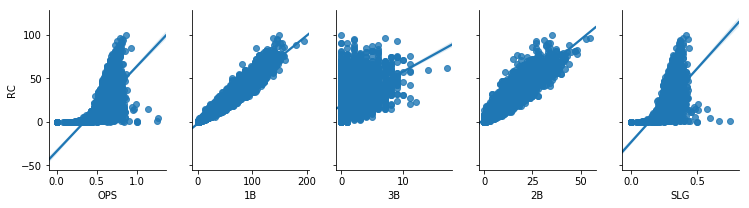

In [13]:
sns.pairplot(dfinf1, x_vars = ['OPS','1B','3B','2B','SLG'], y_vars = 'RC', height = 3, aspect = 0.7, kind = 'reg')

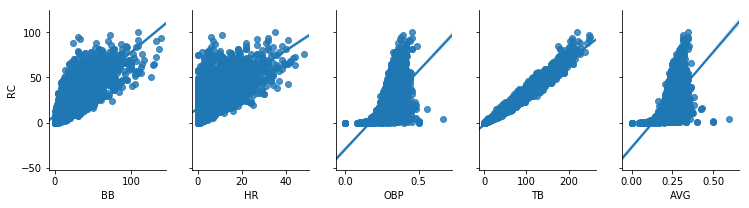

In [14]:
sns.pairplot(dfinf1, x_vars = ['BB','HR','OBP','TB','AVG'], y_vars = 'RC', height = 3, aspect = 0.7, kind = 'reg')

### Infielders who played at least 100 games

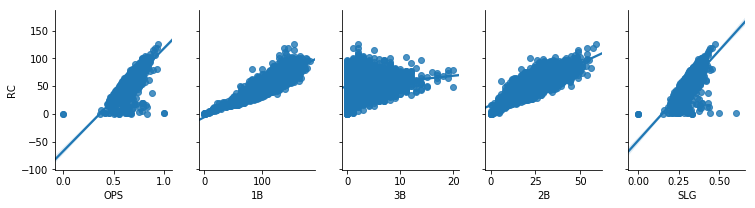

In [15]:
sns.pairplot(dfinf2, x_vars = ['OPS','1B','3B','2B','SLG'], y_vars = 'RC', height = 3, aspect = 0.7, kind = 'reg')

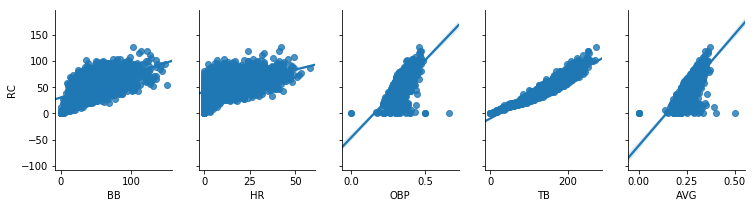

In [16]:
sns.pairplot(dfinf2, x_vars = ['BB','HR','OBP','TB','AVG'], y_vars = 'RC', height = 3, aspect = 0.7, kind = 'reg')

### All Star Infielders

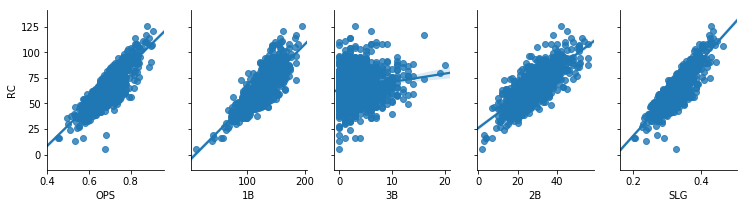

In [17]:
sns.pairplot(dfinf3, x_vars = ['OPS','1B','3B','2B','SLG'], y_vars = 'RC', height = 3, aspect = 0.7, kind = 'reg')

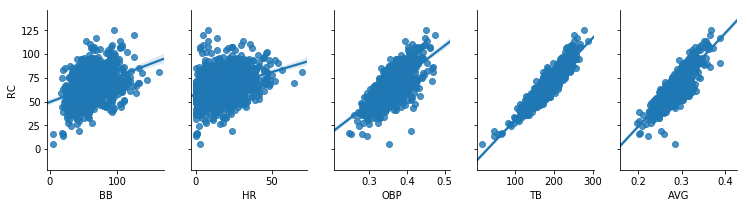

In [18]:
sns.pairplot(dfinf3, x_vars = ['BB','HR','OBP','TB','AVG'], y_vars = 'RC', height = 3, aspect = 0.7, kind = 'reg')

## Machine Learning: Which Features can predict Runs Created (response)? 

### Infielders who played at least 30 games

#### Create X = features and y = response

In [19]:
#What are the features? - AVG, HR, OPS, SLG, BB, 1B, 2B, 3B, H
#What is the response? - Runs Created

features = ['AVG', 'TB', 'HR', 'OPS', 'OBP', 'SLG', 'BB', '1B','2B','3B']
#response = 'RC' (Runs Created)

X = dfinf1[features]
y = dfinf1['RC']

#### Splitting X and y into training and testing sets

In [20]:
#Evaluate the Models
#from sklearn.cross.validation import train_test_split (Doesnt work)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 4)

In [21]:
#default split is 75% for training and 25% for test
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5031, 10)
(1678, 10)
(5031,)
(1678,)


#### Linear Regression to train Model to learn

In [22]:
#import model
from sklearn.linear_model import LinearRegression

#instantiate
linreg = LinearRegression()

#fit the model to the training data(learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [23]:
### Interpreting model coefficents

#### Making Predictions

In [24]:
#make predictions on the X test data
y_pred = linreg.predict(X_test)

In [25]:
from sklearn import metrics

#### Root-Mean Sample Squared Error (Difference btwn Predicted and Test values)

In [26]:
#Infielders with at least 30 gms
#Computing the RMSE for Runs Created
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

2.027644234602305


In [ ]:
#dfinf1 = 2.02  with all 10 features (Outfielders with atleast 30 gms)

### Outfielders who played at least 100 games

#### Create X = features and y = response

In [27]:
features = ['AVG', 'TB', 'HR', 'OPS', 'OBP', 'SLG', 'BB', '1B','2B','3B']
#response = 'RC' (Runs Created)

X = dfinf2[features]
y = dfinf2['RC']

#### Splitting X and y into training and testing sets

In [28]:
#Evaluate the Models
#from sklearn.cross.validation import train_test_split (Doesnt work)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 4)

In [29]:
#default split is 75% for training and 25% for test
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3072, 10)
(1025, 10)
(3072,)
(1025,)


#### Linear Regression to train Model to learn

In [30]:
#import model
from sklearn.linear_model import LinearRegression

#instantiate
linreg = LinearRegression()

#fit the model to the training data(learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### Making Predictions

In [31]:
#make predictions on the X test data
y_pred = linreg.predict(X_test)

In [32]:
from sklearn import metrics

#### Root-Mean Sample Squared Error (Difference btwn Predicted and Test values)

In [33]:
#Infielders with atleast 100 games
#Computing the RMSE for Runs Created
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

2.244103403176226


### All Star Infielders

#### Create X = features and y = response

In [35]:
features = ['AVG', 'TB', 'HR', 'OPS', 'OBP', 'SLG', 'BB', '1B','2B','3B']
#response = 'RC' (Runs Created)

X = dfinf3[features]
y = dfinf3['RC']

#### Splitting X and y into training and testing sets

In [36]:
#Evaluate the Models
#from sklearn.cross.validation import train_test_split (Doesnt work)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 4 )

In [37]:
#default split is 75% for training and 25% for test
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(645, 10)
(215, 10)
(645,)
(215,)


#### Linear Regression to train Model to learn

In [38]:
#import model
from sklearn.linear_model import LinearRegression

#instantiate
linreg = LinearRegression()

#fit the model to the training data(learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### Making Predictions

In [39]:
#make predictions on the X test data
y_pred = linreg.predict(X_test)

In [40]:
from sklearn import metrics

#### Root-Mean Sample Squared Error (Difference btwn Predicted and Test values)

In [41]:
#All Star Infielders.
#Computing the RMSE for Runs Created
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.4039830426576108


## Feature selection - Which are the underperforming features?

### Infielders with atleast 30 games

#### Yellowbrick's Feature Rank Visualizer

In [42]:
features = ['AVG', 'TB', 'HR', 'OPS', 'OBP', 'SLG', 'BB', '1B','2B','3B']
#response = 'RC' (Runs Created)
X = dfinf1[features]
y = ['RC']

In [43]:
from yellowbrick.features import Rank1D
visualizer = Rank1D(features = features, algorithm ='shapiro')

/anaconda3/lib/python3.6/site-packages/yellowbrick/features/rankd.py:262: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X = X.as_matrix()
/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:1309: U

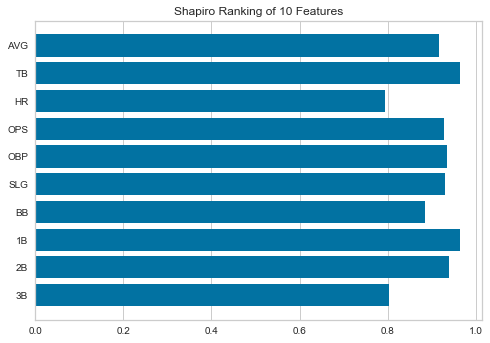

In [44]:
visualizer.fit(X,y)
visualizer.transform(X)
visualizer.poof()

In [ ]:
# Features [HR, 3B, BB, AVG] ranked the worst

#### Yellowbrick's Feature Importance to futher verify Feature Importance

In [45]:
#Infielders with atleast 30 games
#convert y from float to integer
y = dfinf1.RC.astype(int) 

In [46]:
#Infielders with atleast 30 games
#set X value for all 10 features
X = dfinf1[features]

In [47]:
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from yellowbrick.features.importances import FeatureImportances
%matplotlib inline

In [48]:
fig = plt.figure()
ax = fig.add_subplot()
#ax = ax

<Figure size 432x288 with 0 Axes>

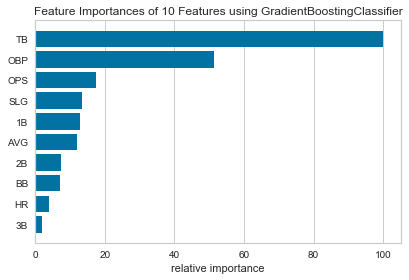

In [49]:
#Infielders with atleast 30 gms
#This model takes over 90 seconds to run
#Features TB, OBP, and OPS are the most important
viz = FeatureImportances(GradientBoostingClassifier(), ax = ax)
viz.fit(X,y)
viz.poof()

#### Yellowbrick's Feature Covariance 2D Rank heat map

In [50]:
#reset value of y to y = dfin1['RC']
y = dfinf1['RC']
from yellowbrick.features import Rank2D
visualizer = Rank2D(features=features, algorithm = 'covariance')

/anaconda3/lib/python3.6/site-packages/yellowbrick/features/rankd.py:262: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X = X.as_matrix()


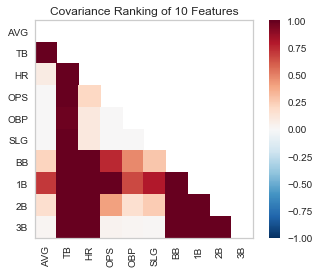

In [51]:
visualizer.fit(X,y)
visualizer.transform(X)
visualizer.poof()

### Infielders with atleast 100 games

#### Yellowbrick's Feature Rank Visualizer

In [53]:
features = ['AVG', 'TB', 'HR', 'OPS', 'OBP', 'SLG', 'BB', '1B','2B','3B']
#response = 'RC' (Runs Created)
X = dfinf2[features]
y = ['RC']

In [54]:
from yellowbrick.features import Rank1D
visualizer = Rank1D(features = features, algorithm ='shapiro')

/anaconda3/lib/python3.6/site-packages/yellowbrick/features/rankd.py:262: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X = X.as_matrix()


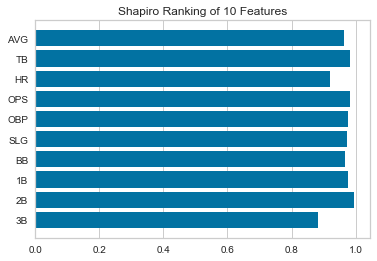

In [55]:
visualizer.fit(X,y)
visualizer.transform(X)
visualizer.poof()

#### Yellowbrick's Feature Importance to futher verify Feature Importance

In [56]:
#Infielders with atleast 100 games
#convert y from float to integer
y = dfinf2.RC.astype(int) 

In [57]:
X = dfinf2[features]

In [58]:
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from yellowbrick.features.importances import FeatureImportances
%matplotlib inline

In [59]:
fig = plt.figure()
ax = fig.add_subplot()
#ax = ax

<Figure size 432x288 with 0 Axes>

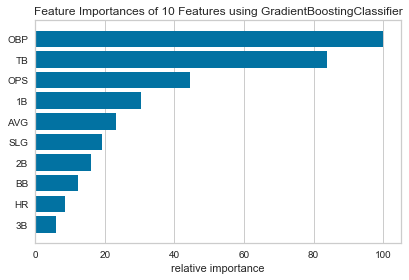

In [60]:
#Infielders with atleast 100 gms
#This model takes over 90 seconds to run
#Features TB, OBP, and OPS are the most important
viz = FeatureImportances(GradientBoostingClassifier(), ax = ax)
viz.fit(X,y)
viz.poof()

#### Yellowbrick's Feature Covariance 2D Rank heat map

In [61]:
#reset value of y to y = dfinf2['RC']
y = dfinf2['RC']
from yellowbrick.features import Rank2D
visualizer = Rank2D(features=features, algorithm = 'covariance')

/anaconda3/lib/python3.6/site-packages/yellowbrick/features/rankd.py:262: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X = X.as_matrix()


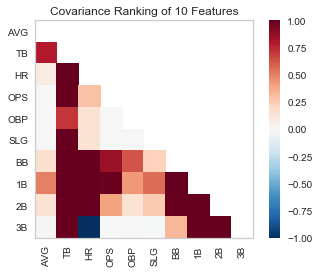

In [62]:
visualizer.fit(X,y)
visualizer.transform(X)
visualizer.poof()

### Allstar Outfielders

#### Yellowbrick's Feature Rank Visualizer

In [72]:
features = ['AVG', 'TB', 'HR', 'OPS', 'OBP', 'SLG', 'BB', '1B','2B','3B']
#response = 'RC' (Runs Created)
X = dfin3[features]
y = ['RC']

In [73]:
from yellowbrick.features import Rank1D
visualizer = Rank1D(features = features, algorithm ='shapiro')

/anaconda3/lib/python3.6/site-packages/yellowbrick/features/rankd.py:262: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X = X.as_matrix()


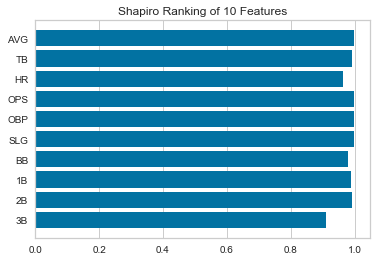

In [74]:
visualizer.fit(X,y)
visualizer.transform(X)
visualizer.poof()

#### Yellowbrick's Feature Importance to futher verify Feature Importance

In [75]:
#convert y from float to integer
y = dfin3.RC.astype(int) 

In [76]:
X = dfin3[features]

In [77]:
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from yellowbrick.features.importances import FeatureImportances
%matplotlib inline

In [78]:
fig = plt.figure()
ax = fig.add_subplot()
#ax = ax

<Figure size 432x288 with 0 Axes>

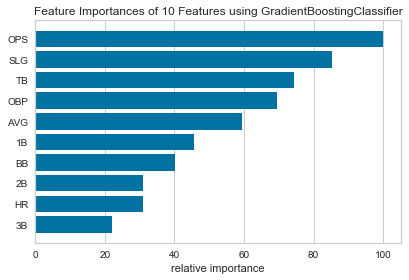

In [79]:
# Features TB, OBP, and OPS are the most important
viz = FeatureImportances(GradientBoostingClassifier(), ax = ax)
viz.fit(X,y)
viz.poof()

#### Yellowbrick's Feature Covariance 2D Rank heat map

In [80]:
#reset value of y to y = dfin3['RC']
y = dfin3['RC']
from yellowbrick.features import Rank2D
visualizer = Rank2D(features=features, algorithm = 'covariance')

/anaconda3/lib/python3.6/site-packages/yellowbrick/features/rankd.py:262: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X = X.as_matrix()


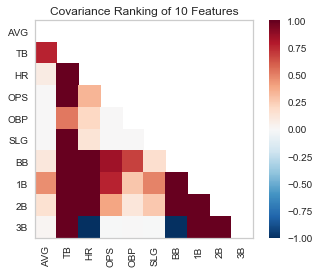

In [81]:
visualizer.fit(X,y)
visualizer.transform(X)
visualizer.poof()

## Prediction and Error Plotting

### Infielders with atleast 30 games

In [63]:
#Reset X and y values
features = ['AVG', 'TB', 'HR', 'OPS', 'OBP', 'SLG', 'BB', '1B','2B','3B']
X = dfinf1[features]
y = dfinf1['RC']

#### Ridge Regression - R2 Score

In [64]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import r2_score

In [65]:

X_train, X_test, y_train, y_test = tts(X,y, random_state = 4, test_size = .2)

#want to first train the model on test data because if the model memorizes the training data and then evaluates, it will overfit
model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)

y_hat = model.predict(X_test)

r2 = r2_score(y_test, y_hat)

print(r2)

0.9717009059080561


In [ ]:
#score to high = overfitted. Must remove features and add noise

In [66]:
#removed TB, OPS, OBP, SLG, '2B'
features = ['AVG','HR','BB', '1B','3B']

In [67]:
X= dfinf1[features]

In [68]:
X_train, X_test, y_train, y_test = tts(X,y, random_state = 4, test_size = .2)
#want to first train the model on test data because if the model memorizes the training data and then evaluates, it will overfit
model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)

y_hat = model.predict(X_test)

r2 = r2_score(y_test, y_hat)

print(r2)

0.9369434967410641


#### Retry with adding noise to features

In [69]:
#add noise to features
features = ['AVG','HR','BB','1B','3B','W', 'G_x', 'birthYear']

In [70]:
#Re-try with removed features
X_train, X_test, y_train, y_test = tts(X,y, random_state = 4, test_size = .2)
#want to first train the model on test data because if the model memorizes the training data and then evaluates, it will overfit
model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)

y_hat = model.predict(X_test)

r2 = r2_score(y_test, y_hat)

print(r2)

0.9369434967410641


#### Lasso Regression -R2 Score

In [71]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import r2_score

In [72]:
#Re-set X with reduced features
features = ['AVG','HR','BB', '1B','3B']
X= dfinf1[features]
y = dfinf1['RC']

In [73]:

X_train, X_test, y_train, y_test = tts(X,y, random_state = 4, test_size = .2)
#want to first train the model on test data because if the model memorizes the training data and then evaluates, it will overfit
model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)

y_hat = model.predict(X_test)

r2 = r2_score(y_test, y_hat)

print(r2)

0.9369434967410641


### Re-measure importance of reduced feautures

In [78]:
features = ['AVG','HR','BB', '1B','3B']
X = dfinf1[features]
y = dfinf1['RC']

In [79]:
from yellowbrick.features import Rank1D
visualizer = Rank1D(features = features, algorithm ='shapiro')

/anaconda3/lib/python3.6/site-packages/yellowbrick/features/rankd.py:262: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X = X.as_matrix()
/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:1309: U

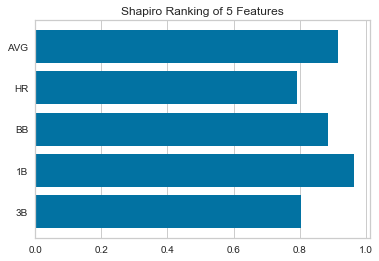

In [77]:
visualizer.fit(X,y)
visualizer.transform(X)
visualizer.poof()

In [84]:
#convert y from float to integer
y = dfinf1.RC.astype(int) 

In [85]:
X = dfinf1[features]

In [86]:
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from yellowbrick.features.importances import FeatureImportances
%matplotlib inline

In [87]:
fig = plt.figure()
ax = fig.add_subplot()

<Figure size 432x288 with 0 Axes>

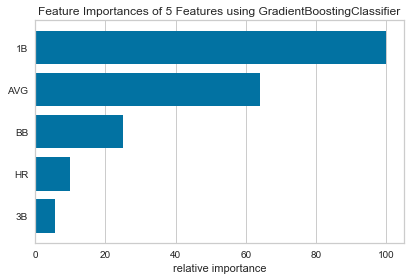

In [88]:
#Model takes over 90 seconds to calculate
viz = FeatureImportances(GradientBoostingClassifier(), ax = ax)
viz.fit(X,y)
viz.poof()

In [89]:
#reset value of y to y = dfinf1['RC']
y = dfinf1['RC']
from yellowbrick.features import Rank2D
visualizer = Rank2D(features=features, algorithm = 'covariance')

/anaconda3/lib/python3.6/site-packages/yellowbrick/features/rankd.py:262: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X = X.as_matrix()


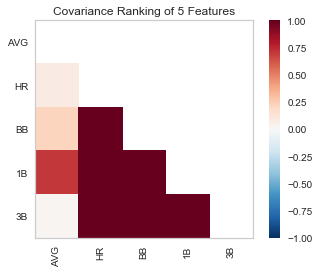

In [90]:
visualizer.fit(X,y)
visualizer.transform(X)
visualizer.poof()

## Data Visualization

### Outfielders with at least 30 gms

#### Visualize Plot Error

In [91]:
#Train Model again

from sklearn.model_selection import train_test_split
data = dfinf1
features = ['AVG','HR','BB', '1B','3B']
X = dfinf1[features]
y = dfinf1['RC']


In [92]:
#Create the train and test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### Ridge Regression R2 Score

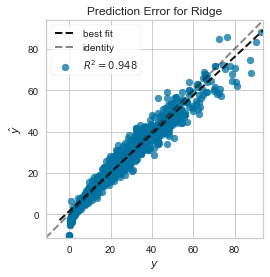

In [93]:
from sklearn.linear_model import Ridge

from yellowbrick.regressor import PredictionError

# Instantiate the linear model and visualizer
Ridge = Ridge()
visualizer = PredictionError(Ridge)#, ##size = (1080,720), legend_size = 3))
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof() 

#### Lasso Regression R2 Score

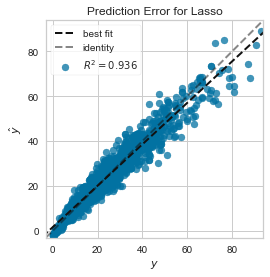

In [94]:
from sklearn.linear_model import Lasso

from yellowbrick.regressor import PredictionError

# Instantiate the linear model and visualizer
Lasso = Lasso()
visualizer = PredictionError(Lasso)#, ##size = (1080,720), legend_size = 3))
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof() 

#### Ridge - Residual Plots

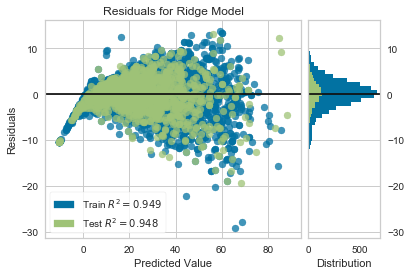

In [95]:
from sklearn.linear_model import Ridge
from yellowbrick.regressor import ResidualsPlot

Ridge = Ridge()
visualizer = ResidualsPlot(Ridge)

visualizer.fit(X_train, y_train)  # Fit the training data to the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()
 

#### Lasso - Resdiual Plots

In [96]:
from sklearn.linear_model import Lasso
from yellowbrick.regressor import ResidualsPlot

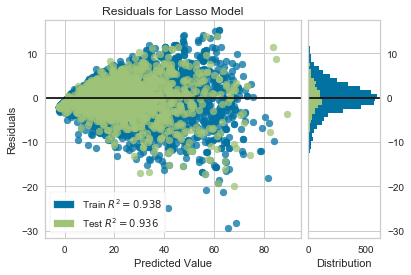

In [97]:
Lasso = Lasso()
visualizer = ResidualsPlot(Lasso)

visualizer.fit(X_train, y_train)  # Fit the training data to the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()

## Prediction and Error Plotting

### Infielders with atleast 100 games

In [99]:
#Reset X and y values
features = ['AVG','HR','BB', '1B','3B']
X = dfinf2[features]
y = dfinf2['RC']

#### Ridge Regression -R2 Score

In [100]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import r2_score

In [101]:

X_train, X_test, y_train, y_test = tts(X,y, random_state = 4, test_size = .2)

#want to first train the model on test data because if the model memorizes the training data and then evaluates, it will overfit
model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)

y_hat = model.predict(X_test)

r2 = r2_score(y_test, y_hat)

print(r2)

0.8315442084234592


#### Lasso Regression -R2 Score

In [102]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import r2_score

In [103]:

X_train, X_test, y_train, y_test = tts(X,y, random_state = 4, test_size = .2)
#want to first train the model on test data because if the model memorizes the training data and then evaluates, it will overfit
model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)

y_hat = model.predict(X_test)

r2 = r2_score(y_test, y_hat)

print(r2)

0.8315442084234592


### Re-measure importance of reduced feautures

In [106]:
features = ['AVG','HR','BB', '1B','3B']
X = dfinf2[features]
y = dfinf2['RC']

In [107]:
from yellowbrick.features import Rank1D
visualizer = Rank1D(features = features, algorithm ='shapiro')

/anaconda3/lib/python3.6/site-packages/yellowbrick/features/rankd.py:262: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X = X.as_matrix()


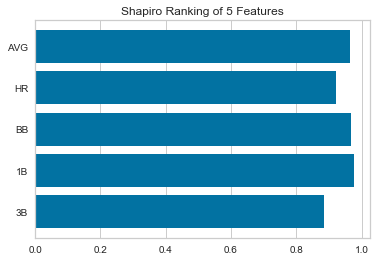

In [108]:
visualizer.fit(X,y)
visualizer.transform(X)
visualizer.poof()

In [111]:
#convert y from float to integer
y = dfinf2.RC.astype(int) 

In [112]:
X = dfinf2[features]

In [113]:
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from yellowbrick.features.importances import FeatureImportances
%matplotlib inline

In [114]:
fig = plt.figure()
ax = fig.add_subplot()
#ax = ax

<Figure size 432x288 with 0 Axes>

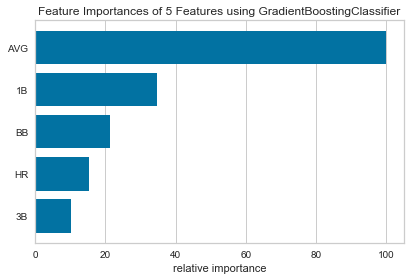

In [115]:
#This takes over 90 seconds to run
#Features TB, OBP, and OPS are the most important
viz = FeatureImportances(GradientBoostingClassifier(), ax = ax)
viz.fit(X,y)
viz.poof()

In [116]:
#reset value of y to y = dfinf2['RC']
y = dfinf2['RC']
from yellowbrick.features import Rank2D
visualizer = Rank2D(features=features, algorithm = 'covariance')

/anaconda3/lib/python3.6/site-packages/yellowbrick/features/rankd.py:262: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X = X.as_matrix()


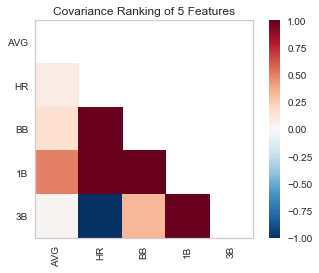

In [117]:
visualizer.fit(X,y)
visualizer.transform(X)
visualizer.poof()

## Data Visualization

### Infielders with at least 100 gms

#### Visualize Plot Error

In [118]:
#Train Model again

from sklearn.model_selection import train_test_split
data = dfinf2
features = ['AVG','HR','BB', '1B','3B']
X = dfinf2[features]
y = dfinf2['RC']

In [119]:
#Create and train and test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### Ridge Regression R2 Score

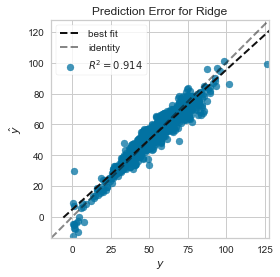

In [120]:
from sklearn.linear_model import Ridge

from yellowbrick.regressor import PredictionError

# Instantiate the linear model and visualizer
Ridge = Ridge()
visualizer = PredictionError(Ridge)#, ##size = (1080,720), legend_size = 3))
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof() 

#### Lasso Regression R2 Score

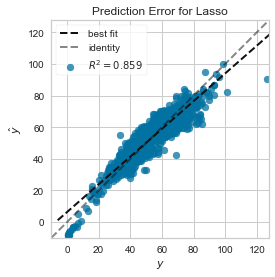

In [121]:
from sklearn.linear_model import Lasso

from yellowbrick.regressor import PredictionError

# Instantiate the linear model and visualizer
Lasso = Lasso()
visualizer = PredictionError(Lasso)#, ##size = (1080,720), legend_size = 3))
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof() 

#### Ridge - Residual Plots

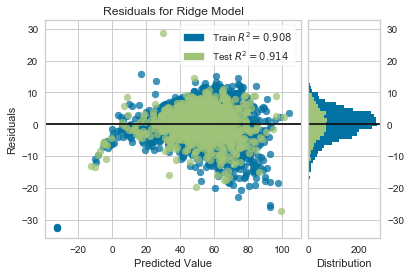

In [122]:
from sklearn.linear_model import Ridge
from yellowbrick.regressor import ResidualsPlot

Ridge = Ridge()
visualizer = ResidualsPlot(Ridge)

visualizer.fit(X_train, y_train)  # Fit the training data to the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()
 

#### Lasso - Residual Plots

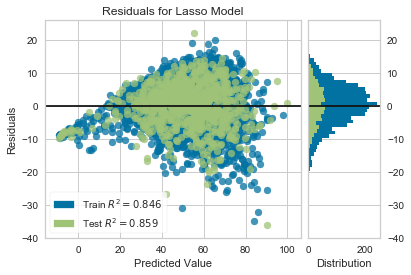

In [123]:
from sklearn.linear_model import Lasso
from yellowbrick.regressor import ResidualsPlot

Lasso = Lasso()
visualizer = ResidualsPlot(Lasso)

visualizer.fit(X_train, y_train)  # Fit the training data to the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()

## Prediction and Error Plotting

### All Star Infielders 

In [124]:
#Reset X and y values
features = ['AVG','HR','BB', '1B','3B']
X = dfinf3[features]
y = dfinf3['RC']

#### Ridge Regression - R2 Score

In [125]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import r2_score

In [126]:

X_train, X_test, y_train, y_test = tts(X,y, random_state = 4, test_size = .2)

#want to first train the model on test data because if the model memorizes the training data and then evaluates, it will overfit
model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)

y_hat = model.predict(X_test)

r2 = r2_score(y_test, y_hat)

print(r2)

0.7428872934162326


#### Lasso Regression -R2 Score

In [127]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import r2_score

In [118]:

X_train, X_test, y_train, y_test = tts(X,y, random_state = 4, test_size = .2)
#want to first train the model on test data because if the model memorizes the training data and then evaluates, it will overfit
model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)

y_hat = model.predict(X_test)

r2 = r2_score(y_test, y_hat)

print(r2)

0.7428872934162326


### Re-measure importance of reduced feautures

In [128]:
features = ['AVG','HR','BB','1B','3B']
X= dfinf3[features]
y = dfinf3['RC']

In [129]:
from yellowbrick.features import Rank1D
visualizer = Rank1D(features = features, algorithm ='shapiro')

/anaconda3/lib/python3.6/site-packages/yellowbrick/features/rankd.py:262: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X = X.as_matrix()


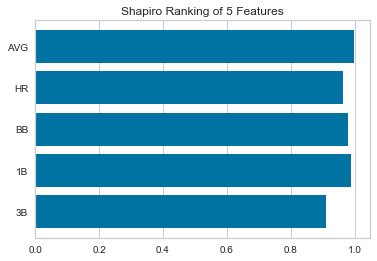

In [130]:
visualizer.fit(X,y)
visualizer.transform(X)
visualizer.poof()

In [132]:
#convert y from float to integer
y = dfinf3.RC.astype(int) 

In [134]:
X = dfinf3[features]

In [135]:
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from yellowbrick.features.importances import FeatureImportances
%matplotlib inline

In [136]:
fig = plt.figure()
ax = fig.add_subplot()
#ax = ax

<Figure size 432x288 with 0 Axes>

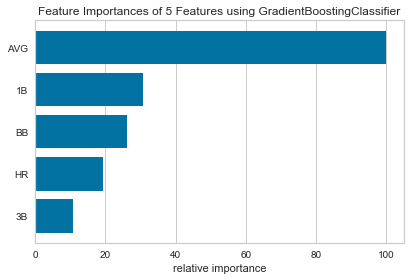

In [137]:
#This model takes over 90 seconds to run
viz = FeatureImportances(GradientBoostingClassifier(), ax = ax)
viz.fit(X,y)
viz.poof()

In [138]:
#reset value of y to y = dfinf3['RC']
y = dfinf3['RC']
from yellowbrick.features import Rank2D
visualizer = Rank2D(features=features, algorithm = 'covariance')

/anaconda3/lib/python3.6/site-packages/yellowbrick/features/rankd.py:262: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X = X.as_matrix()


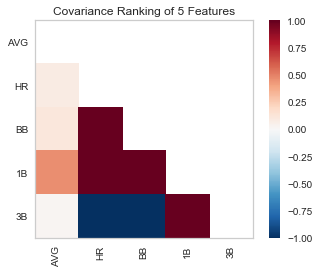

In [139]:
visualizer.fit(X,y)
visualizer.transform(X)
visualizer.poof()

## Data Visualization

### All Star Infielders 

#### Visualize Plot Error

In [141]:
#Train Model again

from sklearn.model_selection import train_test_split
data = dfinf3
features = ['AVG','HR','BB', '1B','3B']
X = dfinf3[features]
y = dfinf3['RC']

In [142]:
#Create and train and test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### Ridge Regression R2 Score

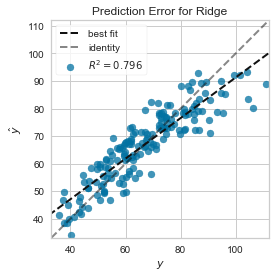

In [143]:
from sklearn.linear_model import Ridge

from yellowbrick.regressor import PredictionError

# Instantiate the linear model and visualizer
Ridge = Ridge()
visualizer = PredictionError(Ridge)#, ##size = (1080,720), legend_size = 3))
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof() 

#### Lasso Regression R2 Score

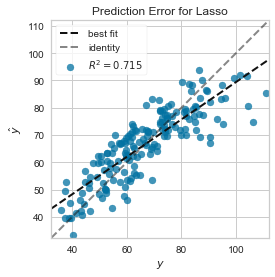

In [144]:
from sklearn.linear_model import Lasso

from yellowbrick.regressor import PredictionError

# Instantiate the linear model and visualizer
Lasso = Lasso()
visualizer = PredictionError(Lasso)#, ##size = (1080,720), legend_size = 3))
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof() 

#### Ridge - Residual Plots

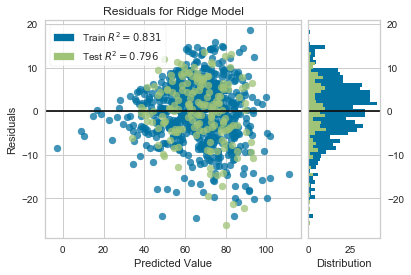

In [145]:
from sklearn.linear_model import Ridge
from yellowbrick.regressor import ResidualsPlot

Ridge = Ridge()
visualizer = ResidualsPlot(Ridge)

visualizer.fit(X_train, y_train)  # Fit the training data to the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()
 

#### Lasso - Residual Plots

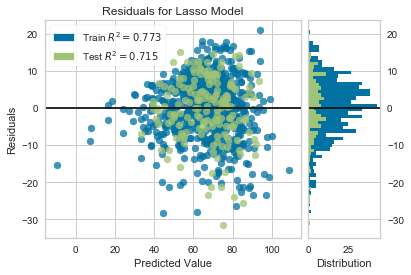

In [146]:
from sklearn.linear_model import Lasso
from yellowbrick.regressor import ResidualsPlot

Lasso = Lasso()
visualizer = ResidualsPlot(Lasso)

visualizer.fit(X_train, y_train)  # Fit the training data to the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()